## Python statistics essential training - 03_09_challenge

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [15]:
import matplotlib
import matplotlib.pyplot as plt

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
messages = pd.read_csv('mbox-cleaned.csv')

In [6]:
messages.head()

,subject,from,to,date,dayofweek,timeofday,nyear
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>",2017-11-27 14:18:46-08:00,Monday,14.300000,2017.907860
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...",2018-03-26 18:38:16-07:00,Monday,18.633333,2018.234843
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,2018-02-13 14:54:50-08:00,Tuesday,14.900000,2018.122165
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,2018-01-26 11:40:04-08:00,Friday,11.666667,2018.072515
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>",2017-10-30 17:13:00-07:00,Monday,17.216667,2017.831533


In [7]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_convert('America/Los_Angeles'))

In [8]:
messages.date

0      2017-11-27 14:18:46-08:00
1      2018-03-26 18:38:16-07:00
2      2018-02-13 14:54:50-08:00
3      2018-01-26 11:40:04-08:00
4      2017-10-30 17:13:00-07:00
                  ...           
1025   2018-03-26 10:40:36-07:00
1026   2018-03-06 21:44:22-08:00
1027   2018-01-23 14:34:19-08:00
1028   2017-12-20 08:28:47-08:00
1029   2017-10-12 14:26:18-07:00
Name: date, Length: 1030, dtype: datetime64[ns, America/Los_Angeles]

In [9]:
messages['dayofweek'] = pd.Categorical(messages['dayofweek'],
                                       ordered = True,
                                       categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [10]:
messages['nyear'] = messages.date.dt.year
messages.nyear

0       2017
1       2018
2       2018
3       2018
4       2017
        ... 
1025    2018
1026    2018
1027    2018
1028    2017
1029    2017
Name: nyear, Length: 1030, dtype: int64

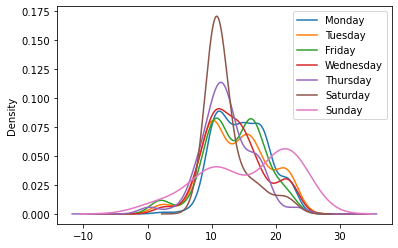

In [16]:
messages.groupby('dayofweek').timeofday.plot(kind='density')
plt.legend(messages.dayofweek.unique());